In [106]:
!pip install ucimlrepo

In [107]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
pd.set_option('display.max_rows', 10)

# Loading dataset

In [109]:
# fetch dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)
data = diabetes_130_us_hospitals_for_years_1999_2008.data.original
data

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,51,0,16,0,0,0,250.13,291,458,9,NaN,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,33,3,18,0,0,1,560,276,787,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,53,0,9,1,0,0,38,590,296,13,NaN,NaN,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,NaN,NaN,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [110]:
pd.set_option('display.max_columns', None)
data.head(50)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,464994,106936875,Caucasian,Female,[40-50),NaN,3,1,2,2,NaN,NaN,10,3,8,0,0,0,626,250.01,998,5,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
46,486156,86240259,Caucasian,Female,[70-80),NaN,3,5,4,9,NaN,InternalMedicine,25,3,16,0,0,2,428,427,250.01,7,NaN,NaN,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,<30
47,498030,51838164,Caucasian,Male,[70-80),NaN,3,3,4,9,NaN,NaN,2,0,12,0,0,1,295,599,250,3,NaN,NaN,Up,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
48,537834,90097839,Caucasian,Male,[50-60),NaN,3,1,2,6,NaN,NaN,65,5,19,0,0,0,414,424,428,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


# Exploring data

In [111]:
# metadata
diabetes_130_us_hospitals_for_years_1999_2008.metadata

{'uci_id': 296,
 'name': 'Diabetes 130-US Hospitals for Years 1999-2008',
 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008',
 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv',
 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide

In [112]:
data.shape

(101766, 50)

## How many hospital admissions and unique patients are in the dataset?

In [113]:
n_admissions = data['encounter_id'].nunique()
n_patients = data['patient_nbr'].nunique()

print(f"Number of hospital admissions: {n_admissions:,}")
print(f"Number of unique patients: {n_patients:,}")

Number of hospital admissions: 101,766
Number of unique patients: 71,518


## How many patients are admitted to hospital more than once?

In [114]:
admissions_per_patient = data['patient_nbr'].value_counts().reset_index()
admissions_per_patient.columns = ['patient_nbr', 'count']
multiple_admissions = admissions_per_patient[admissions_per_patient['count'] > 1]

print(f"Proportion of patients that have multiple admissions: {multiple_admissions['patient_nbr'].nunique()/n_patients:.2%}")
print(f"Maximum number of admissions for a given patient: {multiple_admissions['count'].max()}")

Proportion of patients that have multiple admissions: 23.45%
Maximum number of admissions for a given patient: 40


## Data Integrity

In [115]:
# get an overview over how data is represented inside pd.DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [116]:
# Check max_glue_serum and A1Cresult, because both are not supposed to contain NaN values but both do
for key in data[['max_glu_serum', 'A1Cresult']].keys():
  print("{column_name}: {unique_values}".format(column_name=key, unique_values = data[key].unique()))

max_glu_serum: [nan '>300' 'Norm' '>200']
A1Cresult: [nan '>7' '>8' 'Norm']


In [117]:
pd.isna(data).sum()

encounter_id                  0
patient_nbr                   0
race                       2273
gender                        0
age                           0
                           ... 
metformin-rosiglitazone       0
metformin-pioglitazone        0
change                        0
diabetesMed                   0
readmitted                    0
Length: 50, dtype: int64

#### Results
According to the variable description there are seven variables with missing values. These are the following: *race*, *weight*, *payer_code*, *medical_specialty* and *diag_1*, *diag_2*, *diag_3*. Checking the dataset reveals, that *max_glu_serum* and *A1Cresult* also have missing values.
Upon further inspectione it seems, that the categorical value None got replaced with NaN by pandas.  
* For *weight* and *max_glu_serum* over 90% of values are missing or weren't measured.
* For *A1Cresult* rougly 85% of values were not measured.
* For *payer_code* and *medical_specialty* roughly 50% of values are missing.
* For *race*, *diag_1*, *diag_2*, *diag_3* less than 10% of values are missing.
  
This could lead to different imputing stratagies.

The following variables have deliberate missing values:
* *diag_1*, *diag_2*, *diag_3*: Not all patients have a secondary or an additional secondary diagnosis.
* *max_glu_serum*
* *A1Cresult*

Since the variable *weight* has over 90% missing values, it will be dropped from the dataset. This is also in accordance with the paper by the creators of that dataset who stated that "Weight attribute was considered to be too sparse and it was not included in further analysis" (p. 4).


In [118]:
len(data["encounter_id"].unique())

101766

In [119]:
medicine_columns = data.loc[:, "metformin":"metformin-pioglitazone"]
for col in medicine_columns:
  unique_values = data[col].unique()
  print(f"Unique values for medicine '{col}': {unique_values}")

Unique values for medicine 'metformin': ['No' 'Steady' 'Up' 'Down']
Unique values for medicine 'repaglinide': ['No' 'Up' 'Steady' 'Down']
Unique values for medicine 'nateglinide': ['No' 'Steady' 'Down' 'Up']
Unique values for medicine 'chlorpropamide': ['No' 'Steady' 'Down' 'Up']
Unique values for medicine 'glimepiride': ['No' 'Steady' 'Down' 'Up']
Unique values for medicine 'acetohexamide': ['No' 'Steady']
Unique values for medicine 'glipizide': ['No' 'Steady' 'Up' 'Down']
Unique values for medicine 'glyburide': ['No' 'Steady' 'Up' 'Down']
Unique values for medicine 'tolbutamide': ['No' 'Steady']
Unique values for medicine 'pioglitazone': ['No' 'Steady' 'Up' 'Down']
Unique values for medicine 'rosiglitazone': ['No' 'Steady' 'Up' 'Down']
Unique values for medicine 'acarbose': ['No' 'Steady' 'Up' 'Down']
Unique values for medicine 'miglitol': ['No' 'Steady' 'Down' 'Up']
Unique values for medicine 'troglitazone': ['No' 'Steady']
Unique values for medicine 'tolazamide': ['No' 'Steady' 'Up

## Dropping data
The following variables will be dropped:
* weight: see above
* encounter_id: random ID -> number of unique values are identical to number of rows
* medicine columns that only contain 'No': examide, citoglipton (see cell above)
* race
* max_glu_serum
* A1Cresult
* payer_code
* medical_specialty

The dropping of these variables can later be commented if required.

In [120]:
data.drop("encounter_id", axis=1, inplace=True)
data.drop("weight", axis=1, inplace=True)
data.drop("examide", axis=1, inplace=True)
data.drop("citoglipton", axis=1, inplace=True)
data.drop("payer_code", axis=1, inplace=True)
data.drop("medical_specialty", axis=1, inplace=True)
#data.drop("max_glu_serum", axis=1, inplace=True)
#data.drop("A1Cresult", axis=1, inplace=True)
data.drop("race", axis=1, inplace=True)

data.head(10)

,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,NaN,NaN,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,55629189,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,86047875,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,82442376,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,42519267,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,82637451,Male,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,84259809,Male,[60-70),3,1,2,4,70,1,21,0,0,0,414,411,V45,7,NaN,NaN,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,114882984,Male,[70-80),1,1,7,5,73,0,12,0,0,0,428,492,250,8,NaN,NaN,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,48330783,Female,[80-90),2,1,4,13,68,2,28,0,0,0,398,427,38,8,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,63555939,Female,[90-100),3,3,4,12,33,3,18,0,0,0,434,198,486,8,NaN,NaN,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Understanding Categorical Features
To better understand categorical features, this following section is trying to get an overview over values, distribution of these and which encoding methods are suitable.  


In [121]:
# Check how many unique values each categorical variable has
data_categorical = data.select_dtypes(include=["object"])

for key in data_categorical.keys():
  print("{column_name}: {unique_values} unique values".format(column_name=key, unique_values = len(data_categorical[key].unique())))

gender: 3 unique values
age: 10 unique values
diag_1: 717 unique values
diag_2: 749 unique values
diag_3: 790 unique values
max_glu_serum: 4 unique values
A1Cresult: 4 unique values
metformin: 4 unique values
repaglinide: 4 unique values
nateglinide: 4 unique values
chlorpropamide: 4 unique values
glimepiride: 4 unique values
acetohexamide: 2 unique values
glipizide: 4 unique values
glyburide: 4 unique values
tolbutamide: 2 unique values
pioglitazone: 4 unique values
rosiglitazone: 4 unique values
acarbose: 4 unique values
miglitol: 4 unique values
troglitazone: 2 unique values
tolazamide: 3 unique values
insulin: 4 unique values
glyburide-metformin: 4 unique values
glipizide-metformin: 2 unique values
glimepiride-pioglitazone: 2 unique values
metformin-rosiglitazone: 2 unique values
metformin-pioglitazone: 2 unique values
change: 2 unique values
diabetesMed: 2 unique values
readmitted: 3 unique values


In [122]:
# Check the unique values of prescribed drugs
drug_data = data_categorical.loc[:, 'metformin':'metformin-pioglitazone']
for key in drug_data.keys():
  print("{column_name}: {unique_values}".format(column_name=key, unique_values = drug_data[key].unique()))

metformin: ['No' 'Steady' 'Up' 'Down']
repaglinide: ['No' 'Up' 'Steady' 'Down']
nateglinide: ['No' 'Steady' 'Down' 'Up']
chlorpropamide: ['No' 'Steady' 'Down' 'Up']
glimepiride: ['No' 'Steady' 'Down' 'Up']
acetohexamide: ['No' 'Steady']
glipizide: ['No' 'Steady' 'Up' 'Down']
glyburide: ['No' 'Steady' 'Up' 'Down']
tolbutamide: ['No' 'Steady']
pioglitazone: ['No' 'Steady' 'Up' 'Down']
rosiglitazone: ['No' 'Steady' 'Up' 'Down']
acarbose: ['No' 'Steady' 'Up' 'Down']
miglitol: ['No' 'Steady' 'Down' 'Up']
troglitazone: ['No' 'Steady']
tolazamide: ['No' 'Steady' 'Up']
insulin: ['No' 'Up' 'Steady' 'Down']
glyburide-metformin: ['No' 'Steady' 'Down' 'Up']
glipizide-metformin: ['No' 'Steady']
glimepiride-pioglitazone: ['No' 'Steady']
metformin-rosiglitazone: ['No' 'Steady']
metformin-pioglitazone: ['No' 'Steady']


In [123]:
# Take at look at the three missing categorical variables because their datatype is int
categorical_numerical_data = data[['admission_type_id', 'discharge_disposition_id', 'admission_source_id']]
for key in categorical_numerical_data.keys():
  print("{column_name}: {unique_values} in total {n} unique values".format(column_name=key, unique_values = categorical_numerical_data[key].unique(), n = len(categorical_numerical_data[key].unique())))

admission_type_id: [6 1 2 3 4 5 8 7] in total 8 unique values
discharge_disposition_id: [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27] in total 26 unique values
admission_source_id: [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13] in total 17 unique values


#### Results:
comparing the information given through the variable description by UCI and the results above, we can deduce the following:  
The following variables are not categorical but binary:

*   change
*   diabetesMed  
  
The 23 different variables describing drug prescription should in theory all contain four unique values. On a first glance there are a few variables that seem to be binary, after further inspection, these are clearly not binary. Not all variables have as many unqiue values as stated in the variables description. This needs to be inspected further.
  
All remaining non binary categorials can be grouped into the following groups:

**Nominal:**

*   race
*   gender
*   payer_code
*   diag_1, diag_2, diag_3
*   medical_specialty
*   all three ids (admission_type_id, discharge_disposition_id, admissin_source_id)

**Ordinal:**

*   age
*   weight
*   max_glu_serum
*   A1Cresult
*   all drug prescreption variables
*   readmitted

There are three variables with an exceptional large range of unique values, these are:


*   diag_1
*   diag_2
*   diag_3

Further there are two more variables with a larger range of unique values, these are:


*   payer_code
*   medical_specialty
*   discharge_disposition_id
*   admission_source_id

All this has to be considered when choosing an encoding method. My first guess would be label encoding the variables with a large range of unique values and ordinal variables. The remaining nominal valriables could be encoded using one hot encoding.




# Data Cleansing

* Coding of categorical variables
* Treatment of missing values
* Treatment of outliers
* Feature scaling



In [124]:
data.head(10)

,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,NaN,NaN,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,55629189,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,86047875,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,82442376,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,42519267,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,82637451,Male,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,84259809,Male,[60-70),3,1,2,4,70,1,21,0,0,0,414,411,V45,7,NaN,NaN,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,114882984,Male,[70-80),1,1,7,5,73,0,12,0,0,0,428,492,250,8,NaN,NaN,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,48330783,Female,[80-90),2,1,4,13,68,2,28,0,0,0,398,427,38,8,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,63555939,Female,[90-100),3,3,4,12,33,3,18,0,0,0,434,198,486,8,NaN,NaN,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [125]:
data.columns

Index(['patient_nbr', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

## Coding of categorical variables

### ICD-9 codes
## Grouping and encoding ICD-9 codes
All values within the columns diag_1, diag_2 and diag_3 are strings. The ICD-9 codes are contained within these strings. Not all of these codes are numeric. However, the groups mentioned in the paper and adopted here all contain only numeric codes. Therefore, non-numeric codes can be sorted into "Other".

**Groups:**
*   Circulatory: 390-459, 785
*   Respiratory: 460-519
* Digestive: 520-579, 787
* Diabetes: 250.x.x
* Injury: 800-999
* Musculoskeletal: 710-739
* Genitourinary: 580–629, 788
* Neoplasms: 140–239
* Other: 780, 781, 784, 790–799, 240-249, 251-279, 680-709, 782, 001–139, 290–319, E-V, 280-289, 320-359, 630-679, 360-389, 740-759


In [126]:
unique_diag_1 = data["diag_1"].unique()
unique_diag_1

array(['250.83', '276', '648', '8', '197', '414', '428', '398', '434',
       '250.7', '157', '518', '999', '410', '682', '402', '737', '572',
       'V57', '189', '786', '427', '996', '277', '584', '462', '473',
       '411', '174', '486', '998', '511', '432', '626', '295', '196',
       '250.6', '618', '182', '845', '423', '808', '250.4', '722', '403',
       '250.11', '784', '707', '440', '151', '715', '997', '198', '564',
       '812', '38', '590', '556', '578', '250.32', '433', 'V58', '569',
       '185', '536', '255', '250.13', '599', '558', '574', '491', '560',
       '244', '250.03', '577', '730', '188', '824', '250.8', '332', '562',
       '291', '296', '510', '401', '263', '438', '70', '250.02', '493',
       '642', '625', '571', '738', '593', '250.42', '807', '456', '446',
       '575', '250.41', '820', '515', '780', '250.22', '995', '235',
       '250.82', '721', '787', '162', '724', '282', '514', 'V55', '281',
       '250.33', '530', '466', '435', '250.12', 'V53', '789', '

In [127]:
data['diag_1'].isna().sum()

21

Since only 0,0206% of rows have a missing value in *diag_1*, these rows can be dropped.

In [128]:
nr_rows_before = data.shape[0]
print(f"Number of rows before dropping: ", nr_rows_before)
data.dropna(subset=['diag_1'], inplace=True)
nr_rows_after = data.shape[0]
print(f"Number of rows after dropping: ", nr_rows_after)
print(f"Number rows dropped: ", nr_rows_before-nr_rows_after)


Number of rows before dropping:  101766
Number of rows after dropping:  101745
Number rows dropped:  21


In [129]:
# grouping of codes
def group_diagnosis(code):
    if pd.isnull(code):
        return "Missing"
    if code.startswith('250'):
        return 'Diabetes'
    if not code.isdigit():  # Überprüfen, ob der Code keine Zahl ist
        return 'Other'
    code = float(code)
    if 390 <= code <= 459 or code == 785:
        return 'Circulatory'
    elif 460 <= code <= 519 or code == 786:
        return 'Respiratory'
    elif 520 <= code <= 579 or code == 787:
        return 'Digestive'
    elif 800 <= code <= 999:
        return 'Injury'
    elif 710 <= code <= 739:
        return 'Musculoskeletal'
    elif 580 <= code <= 629 or code == 788:
        return 'Genitourinary'
    elif 140 <= code <= 239:
        return 'Neoplasms'
    else:
        return 'Other'

data['diag_1_group'] = data['diag_1'].apply(group_diagnosis)
data['diag_2_group'] = data['diag_2'].apply(group_diagnosis)
data['diag_3_group'] = data['diag_3'].apply(group_diagnosis)

pd.set_option('display.max_columns', None)
data.head()

,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diag_1_group,diag_2_group,diag_3_group
0,8222157,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,NaN,NaN,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,Diabetes,Missing,Missing
1,55629189,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Other,Diabetes,Other
2,86047875,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Other,Diabetes,Other
3,82442376,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Other,Diabetes,Circulatory
4,42519267,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Neoplasms,Neoplasms,Diabetes


In [130]:
# One Hot Encoding diag_1
diag_1_group_encoded = pd.get_dummies(data['diag_1_group'], prefix='diag_1', dtype=int)
data = pd.concat([data, diag_1_group_encoded], axis=1)
data.drop('diag_1_group', axis=1, inplace=True)

# One Hot Encoding diag_2
diag_2_group_encoded = pd.get_dummies(data['diag_2_group'], prefix='diag_2', dtype=int)
data = pd.concat([data, diag_2_group_encoded], axis=1)
data.drop('diag_2_group', axis=1, inplace=True)

# One Hot Encoding diag_3
diag_3_group_encoded = pd.get_dummies(data['diag_3_group'], prefix='diag_3', dtype=int)
data = pd.concat([data, diag_3_group_encoded], axis=1)
data.drop('diag_3_group', axis=1, inplace=True)

data.head()

,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diag_1_Circulatory,diag_1_Diabetes,diag_1_Digestive,diag_1_Genitourinary,diag_1_Injury,diag_1_Musculoskeletal,diag_1_Neoplasms,diag_1_Other,diag_1_Respiratory,diag_2_Circulatory,diag_2_Diabetes,diag_2_Digestive,diag_2_Genitourinary,diag_2_Injury,diag_2_Missing,diag_2_Musculoskeletal,diag_2_Neoplasms,diag_2_Other,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Missing,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Other,diag_3_Respiratory
0,8222157,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,NaN,NaN,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,55629189,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,86047875,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,82442376,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,42519267,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [131]:
data.drop("diag_1", axis=1, inplace=True)
data.drop("diag_2", axis=1, inplace=True)
data.drop("diag_3", axis=1, inplace=True)
data.head()

,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diag_1_Circulatory,diag_1_Diabetes,diag_1_Digestive,diag_1_Genitourinary,diag_1_Injury,diag_1_Musculoskeletal,diag_1_Neoplasms,diag_1_Other,diag_1_Respiratory,diag_2_Circulatory,diag_2_Diabetes,diag_2_Digestive,diag_2_Genitourinary,diag_2_Injury,diag_2_Missing,diag_2_Musculoskeletal,diag_2_Neoplasms,diag_2_Other,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Missing,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Other,diag_3_Respiratory
0,8222157,Female,[0-10),6,25,1,1,41,0,1,0,0,0,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,55629189,Female,[10-20),1,1,7,3,59,0,18,0,0,0,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,86047875,Female,[20-30),1,1,7,2,11,5,13,2,0,1,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,82442376,Male,[30-40),1,1,7,2,44,1,16,0,0,0,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,42519267,Male,[40-50),1,1,7,1,51,0,8,0,0,0,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


## Coding admission type

**Admission types ID:**

1 = Emergency  
2 = Urgent  
3 = Elective  
4 = Newborn  
5 = Not Available  
6 = NULL  
7 = Trauma Center  
8 = Not Mapped

**Grouped to:**

Emergency = 1,2,7  
Elective = 3  
Newborn = 4  
Unavailable = 5,6,8

In [132]:
data["admission_type_id"].unique()

array([6, 1, 2, 3, 4, 5, 8, 7])

In [133]:
admission_type_map = {
    'admission_type_id': [1, 2, 3, 4, 5, 6, 7, 8],
    'description': ['Emergency', 'Urgent', 'Elective', 'Newborn', 'Not Available', 'NaN', 'Trauma Center', 'Not Mapped']
}

admission_type = pd.DataFrame(admission_type_map)
admission_type

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


In [134]:
# collapsing three types of missing values into one: 'Not Available', 'nan' and 'Not Mapped'
missing_values = ['nan', 'Not Available', 'Not Mapped']
admission_type['description'] = admission_type['description'].replace(missing_values, np.nan)
admission_type.columns = ['admission_type_id', 'admission_type']
data = data.merge(admission_type, on='admission_type_id')
data

,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diag_1_Circulatory,diag_1_Diabetes,diag_1_Digestive,diag_1_Genitourinary,diag_1_Injury,diag_1_Musculoskeletal,diag_1_Neoplasms,diag_1_Other,diag_1_Respiratory,diag_2_Circulatory,diag_2_Diabetes,diag_2_Digestive,diag_2_Genitourinary,diag_2_Injury,diag_2_Missing,diag_2_Musculoskeletal,diag_2_Neoplasms,diag_2_Other,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Missing,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Other,diag_3_Respiratory,admission_type
0,8222157,Female,[0-10),6,25,1,1,41,0,1,0,0,0,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,NaN
1,720936,Female,[70-80),6,25,1,10,56,2,24,0,0,0,9,NaN,>7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN
2,661014,Male,[60-70),6,25,7,9,61,4,25,0,0,0,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,NaN
3,1719279,Male,[40-50),6,25,7,11,68,0,25,0,0,0,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Ch,Yes,>30,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN
4,7919802,Female,[40-50),6,25,7,6,47,2,13,0,0,0,8,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101740,141434069,Female,[80-90),7,11,7,1,1,2,5,0,0,0,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Trauma Center
101741,141433160,Female,[80-90),7,3,7,4,66,0,16,0,0,0,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Trauma Center
101742,141357506,Male,[50-60),7,3,7,6,61,1,14,0,0,0,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,Trauma Center
101743,141466478,Male,[10-20),7,6,7,9,45,6,23,0,0,0,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Trauma Center


In [135]:
data['admission_type'].value_counts()

admission_type
Emergency        53979
Elective         18862
Urgent           18478
NaN               5290
Trauma Center       21
Newborn             10
Name: count, dtype: int64

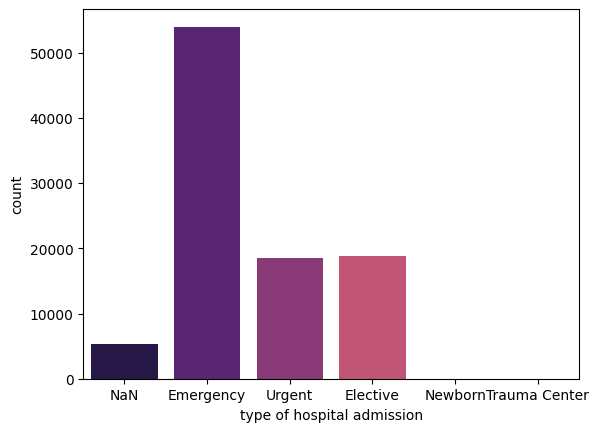

In [136]:
sns.countplot(x='admission_type', data=data, palette='magma')
plt.xlabel('type of hospital admission')
plt.show()

### one hot encoding of admission type

In [137]:
admission_dummies = pd.get_dummies(data["admission_type"], prefix="admission_type", dtype=int)
data = pd.concat([data, admission_dummies], axis=1)
data.drop(columns="admission_type", axis=1, inplace=True)
data

,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diag_1_Circulatory,diag_1_Diabetes,diag_1_Digestive,diag_1_Genitourinary,diag_1_Injury,diag_1_Musculoskeletal,diag_1_Neoplasms,diag_1_Other,diag_1_Respiratory,diag_2_Circulatory,diag_2_Diabetes,diag_2_Digestive,diag_2_Genitourinary,diag_2_Injury,diag_2_Missing,diag_2_Musculoskeletal,diag_2_Neoplasms,diag_2_Other,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Missing,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Other,diag_3_Respiratory,admission_type_Elective,admission_type_Emergency,admission_type_NaN,admission_type_Newborn,admission_type_Trauma Center,admission_type_Urgent
0,8222157,Female,[0-10),6,25,1,1,41,0,1,0,0,0,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,720936,Female,[70-80),6,25,1,10,56,2,24,0,0,0,9,NaN,>7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,661014,Male,[60-70),6,25,7,9,61,4,25,0,0,0,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1719279,Male,[40-50),6,25,7,11,68,0,25,0,0,0,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Ch,Yes,>30,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,7919802,Female,[40-50),6,25,7,6,47,2,13,0,0,0,8,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101740,141434069,Female,[80-90),7,11,7,1,1,2,5,0,0,0,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
101741,141433160,Female,[80-90),7,3,7,4,66,0,16,0,0,0,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
101742,141357506,Male,[50-60),7,3,7,6,61,1,14,0,0,0,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
101743,141466478,Male,[10-20),7,6,7,9,45,6,23,0,0,0,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


## Medication

In [138]:
medications = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
    'insulin', 'glyburide-metformin', 'glipizide-metformin',
    'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

print(f"There are {len(medications)} medications represented as columns in the dataset.")

There are 21 medications represented as columns in the dataset.


In [139]:
data.head()

,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diag_1_Circulatory,diag_1_Diabetes,diag_1_Digestive,diag_1_Genitourinary,diag_1_Injury,diag_1_Musculoskeletal,diag_1_Neoplasms,diag_1_Other,diag_1_Respiratory,diag_2_Circulatory,diag_2_Diabetes,diag_2_Digestive,diag_2_Genitourinary,diag_2_Injury,diag_2_Missing,diag_2_Musculoskeletal,diag_2_Neoplasms,diag_2_Other,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Missing,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Other,diag_3_Respiratory,admission_type_Elective,admission_type_Emergency,admission_type_NaN,admission_type_Newborn,admission_type_Trauma Center,admission_type_Urgent
0,8222157,Female,[0-10),6,25,1,1,41,0,1,0,0,0,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,720936,Female,[70-80),6,25,1,10,56,2,24,0,0,0,9,NaN,>7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,661014,Male,[60-70),6,25,7,9,61,4,25,0,0,0,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1719279,Male,[40-50),6,25,7,11,68,0,25,0,0,0,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Ch,Yes,>30,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,7919802,Female,[40-50),6,25,7,6,47,2,13,0,0,0,8,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [140]:
data[medications[0]].value_counts()

metformin
No        81762
Steady    18341
Up         1067
Down        575
Name: count, dtype: int64

* *No*: drug was not prescribed
* *Steady*: dosage did not change (drug was prescribed)
* *Up*: dosage was increased during the encounter
* *Down*: dosage was decreased during the encounter

To keep it simple at the start, the only thing of interest right now is whether the drug was currently in use or not. So *No* will be 0 and the three other categories will be *1*.

In [141]:
for m in medications:
    data[f'{m}_bool'] = np.where(data[m]=='No', 0, 1)
    data = data.drop(columns=m)
data

,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,diag_1_Circulatory,diag_1_Diabetes,diag_1_Digestive,diag_1_Genitourinary,diag_1_Injury,diag_1_Musculoskeletal,diag_1_Neoplasms,diag_1_Other,diag_1_Respiratory,diag_2_Circulatory,diag_2_Diabetes,diag_2_Digestive,diag_2_Genitourinary,diag_2_Injury,diag_2_Missing,diag_2_Musculoskeletal,diag_2_Neoplasms,diag_2_Other,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Missing,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Other,diag_3_Respiratory,admission_type_Elective,admission_type_Emergency,admission_type_NaN,admission_type_Newborn,admission_type_Trauma Center,admission_type_Urgent,metformin_bool,repaglinide_bool,nateglinide_bool,chlorpropamide_bool,glimepiride_bool,acetohexamide_bool,glipizide_bool,glyburide_bool,tolbutamide_bool,pioglitazone_bool,rosiglitazone_bool,acarbose_bool,miglitol_bool,troglitazone_bool,tolazamide_bool,insulin_bool,glyburide-metformin_bool,glipizide-metformin_bool,glimepiride-pioglitazone_bool,metformin-rosiglitazone_bool,metformin-pioglitazone_bool
0,8222157,Female,[0-10),6,25,1,1,41,0,1,0,0,0,1,NaN,NaN,No,No,NO,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,720936,Female,[70-80),6,25,1,10,56,2,24,0,0,0,9,NaN,>7,Ch,Yes,>30,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,661014,Male,[60-70),6,25,7,9,61,4,25,0,0,0,9,NaN,NaN,Ch,Yes,NO,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1719279,Male,[40-50),6,25,7,11,68,0,25,0,0,0,9,NaN,NaN,Ch,Yes,>30,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,7919802,Female,[40-50),6,25,7,6,47,2,13,0,0,0,8,NaN,NaN,No,No,NO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101740,141434069,Female,[80-90),7,11,7,1,1,2,5,0,0,0,7,NaN,NaN,No,Yes,NO,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
101741,141433160,Female,[80-90),7,3,7,4,66,0,16,0,0,0,9,NaN,NaN,No,No,NO,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
101742,141357506,Male,[50-60),7,3,7,6,61,1,14,0,0,0,9,NaN,NaN,No,Yes,NO,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
101743,141466478,Male,[10-20),7,6,7,9,45,6,23,0,0,0,9,NaN,NaN,No,No,NO,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [142]:
prevalence = []

for m in medications:
    patient_meds = data.groupby('patient_nbr')[f'{m}_bool'].sum().reset_index()
    patient_meds[f'{m}_bool'] = patient_meds[f'{m}_bool'].astype(bool)
    n_patients_on_med = patient_meds[f'{m}_bool'].sum()
    proportion = n_patients_on_med/n_patients
    prevalence.append(proportion)


medication_counts = pd.DataFrame({'medication': medications, 'prevalence':prevalence})
medication_counts = medication_counts.sort_values(by='prevalence', ascending=False)
medication_counts.head()

,medication,prevalence
15,insulin,0.553301
0,metformin,0.230334
6,glipizide,0.139769
7,glyburide,0.119648
9,pioglitazone,0.083028


55% of patients that were taking medication have been described insulin.

In further analysis, it could be interesting to create a correlation matrix between the diagnosis of Diabetes and the prescription of insulin.

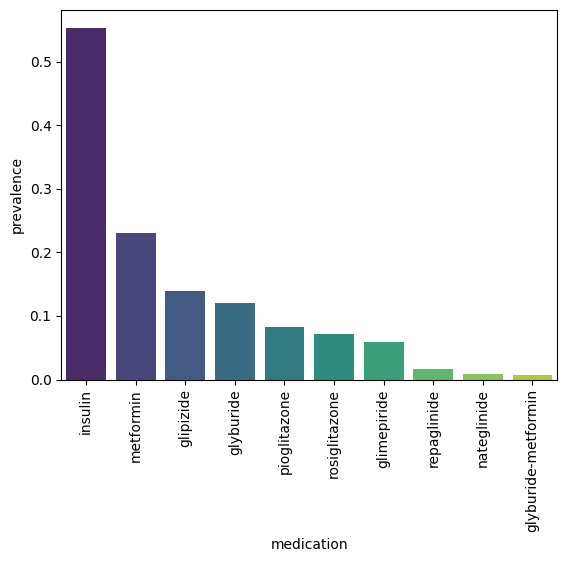

In [143]:
sns.barplot(x='medication', y='prevalence', data=medication_counts.head(10), palette='viridis')
plt.xticks(rotation=90)
plt.show()

### Encode max_glu_serum and A1Cresult

In [144]:
# For max_glu_serum and A1Cresult the categorical value None got replace with np.nan while fetching the data and reading it as a DataFrame
# these have to be replaced by categorical values again. In This case np.nan gets replaced with 'No', to be consitent with drug presciptiosn
data[['max_glu_serum', 'A1Cresult']] = data[['max_glu_serum', 'A1Cresult']].fillna(value='No')

# Encode 'max_glu_serum' and 'A1Cresult'
max_glu_serum_encodings = {'No' : 0, 'Norm' : 1, '>200': 2, '>300' : 3}
A1Cresult_encodings = {'No' : 0, 'Norm' :1, '>7' : 2, '>8' : 3}

data['max_glu_serum'] = data['max_glu_serum'].map(max_glu_serum_encodings)
data['A1Cresult'] = data['A1Cresult'].map(A1Cresult_encodings)
data

,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,diag_1_Circulatory,diag_1_Diabetes,diag_1_Digestive,diag_1_Genitourinary,diag_1_Injury,diag_1_Musculoskeletal,diag_1_Neoplasms,diag_1_Other,diag_1_Respiratory,diag_2_Circulatory,diag_2_Diabetes,diag_2_Digestive,diag_2_Genitourinary,diag_2_Injury,diag_2_Missing,diag_2_Musculoskeletal,diag_2_Neoplasms,diag_2_Other,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Missing,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Other,diag_3_Respiratory,admission_type_Elective,admission_type_Emergency,admission_type_NaN,admission_type_Newborn,admission_type_Trauma Center,admission_type_Urgent,metformin_bool,repaglinide_bool,nateglinide_bool,chlorpropamide_bool,glimepiride_bool,acetohexamide_bool,glipizide_bool,glyburide_bool,tolbutamide_bool,pioglitazone_bool,rosiglitazone_bool,acarbose_bool,miglitol_bool,troglitazone_bool,tolazamide_bool,insulin_bool,glyburide-metformin_bool,glipizide-metformin_bool,glimepiride-pioglitazone_bool,metformin-rosiglitazone_bool,metformin-pioglitazone_bool
0,8222157,Female,[0-10),6,25,1,1,41,0,1,0,0,0,1,0,0,No,No,NO,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,720936,Female,[70-80),6,25,1,10,56,2,24,0,0,0,9,0,2,Ch,Yes,>30,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,661014,Male,[60-70),6,25,7,9,61,4,25,0,0,0,9,0,0,Ch,Yes,NO,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1719279,Male,[40-50),6,25,7,11,68,0,25,0,0,0,9,0,0,Ch,Yes,>30,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,7919802,Female,[40-50),6,25,7,6,47,2,13,0,0,0,8,0,0,No,No,NO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101740,141434069,Female,[80-90),7,11,7,1,1,2,5,0,0,0,7,0,0,No,Yes,NO,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
101741,141433160,Female,[80-90),7,3,7,4,66,0,16,0,0,0,9,0,0,No,No,NO,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
101742,141357506,Male,[50-60),7,3,7,6,61,1,14,0,0,0,9,0,0,No,Yes,NO,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
101743,141466478,Male,[10-20),7,6,7,9,45,6,23,0,0,0,9,0,0,No,No,NO,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Label Encoding of Age and Gender

Since age is an ordinal variable (it has an intrinsic order), we can use label encoding to encode this variable.

Gender is binary and can also be encoded using a label encoder.

In [145]:
data["gender"].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [146]:
len(data.loc[data["gender"] == "Unknown/Invalid"])

3

Since there are only three rows with "Unknown/Invalid" as value for gender, these rows will be dropped.

In [147]:
data.drop(data[data["gender"] == "Unknown/Invalid"].index, inplace=True)

In [148]:
data["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [149]:
# Binary encoding of gender
gender = {"Male": 0, "Female": 1}
data["gender"] = data["gender"].map(gender)
data.head()

,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,diag_1_Circulatory,diag_1_Diabetes,diag_1_Digestive,diag_1_Genitourinary,diag_1_Injury,diag_1_Musculoskeletal,diag_1_Neoplasms,diag_1_Other,diag_1_Respiratory,diag_2_Circulatory,diag_2_Diabetes,diag_2_Digestive,diag_2_Genitourinary,diag_2_Injury,diag_2_Missing,diag_2_Musculoskeletal,diag_2_Neoplasms,diag_2_Other,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Missing,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Other,diag_3_Respiratory,admission_type_Elective,admission_type_Emergency,admission_type_NaN,admission_type_Newborn,admission_type_Trauma Center,admission_type_Urgent,metformin_bool,repaglinide_bool,nateglinide_bool,chlorpropamide_bool,glimepiride_bool,acetohexamide_bool,glipizide_bool,glyburide_bool,tolbutamide_bool,pioglitazone_bool,rosiglitazone_bool,acarbose_bool,miglitol_bool,troglitazone_bool,tolazamide_bool,insulin_bool,glyburide-metformin_bool,glipizide-metformin_bool,glimepiride-pioglitazone_bool,metformin-rosiglitazone_bool,metformin-pioglitazone_bool
0,8222157,1,[0-10),6,25,1,1,41,0,1,0,0,0,1,0,0,No,No,NO,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,720936,1,[70-80),6,25,1,10,56,2,24,0,0,0,9,0,2,Ch,Yes,>30,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,661014,0,[60-70),6,25,7,9,61,4,25,0,0,0,9,0,0,Ch,Yes,NO,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1719279,0,[40-50),6,25,7,11,68,0,25,0,0,0,9,0,0,Ch,Yes,>30,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,7919802,1,[40-50),6,25,7,6,47,2,13,0,0,0,8,0,0,No,No,NO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [150]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data["age_label"] = label_encoder.fit_transform(data["age"])

data.drop("age", axis=1, inplace=True)
data.head()

,patient_nbr,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,diag_1_Circulatory,diag_1_Diabetes,diag_1_Digestive,diag_1_Genitourinary,diag_1_Injury,diag_1_Musculoskeletal,diag_1_Neoplasms,diag_1_Other,diag_1_Respiratory,diag_2_Circulatory,diag_2_Diabetes,diag_2_Digestive,diag_2_Genitourinary,diag_2_Injury,diag_2_Missing,diag_2_Musculoskeletal,diag_2_Neoplasms,diag_2_Other,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Missing,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Other,diag_3_Respiratory,admission_type_Elective,admission_type_Emergency,admission_type_NaN,admission_type_Newborn,admission_type_Trauma Center,admission_type_Urgent,metformin_bool,repaglinide_bool,nateglinide_bool,chlorpropamide_bool,glimepiride_bool,acetohexamide_bool,glipizide_bool,glyburide_bool,tolbutamide_bool,pioglitazone_bool,rosiglitazone_bool,acarbose_bool,miglitol_bool,troglitazone_bool,tolazamide_bool,insulin_bool,glyburide-metformin_bool,glipizide-metformin_bool,glimepiride-pioglitazone_bool,metformin-rosiglitazone_bool,metformin-pioglitazone_bool,age_label
0,8222157,1,6,25,1,1,41,0,1,0,0,0,1,0,0,No,No,NO,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,720936,1,6,25,1,10,56,2,24,0,0,0,9,0,2,Ch,Yes,>30,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7
2,661014,0,6,25,7,9,61,4,25,0,0,0,9,0,0,Ch,Yes,NO,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6
3,1719279,0,6,25,7,11,68,0,25,0,0,0,9,0,0,Ch,Yes,>30,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,4
4,7919802,1,6,25,7,6,47,2,13,0,0,0,8,0,0,No,No,NO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


### diabetesMed

In [151]:
data["diabetesMed"].unique()

array(['No', 'Yes'], dtype=object)

In [152]:
diabetesMed_map = {'Yes': 1, 'No': 0}
data["diabetesMed"] = data["diabetesMed"].map(diabetesMed_map)
data.head()

,patient_nbr,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,diag_1_Circulatory,diag_1_Diabetes,diag_1_Digestive,diag_1_Genitourinary,diag_1_Injury,diag_1_Musculoskeletal,diag_1_Neoplasms,diag_1_Other,diag_1_Respiratory,diag_2_Circulatory,diag_2_Diabetes,diag_2_Digestive,diag_2_Genitourinary,diag_2_Injury,diag_2_Missing,diag_2_Musculoskeletal,diag_2_Neoplasms,diag_2_Other,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Missing,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Other,diag_3_Respiratory,admission_type_Elective,admission_type_Emergency,admission_type_NaN,admission_type_Newborn,admission_type_Trauma Center,admission_type_Urgent,metformin_bool,repaglinide_bool,nateglinide_bool,chlorpropamide_bool,glimepiride_bool,acetohexamide_bool,glipizide_bool,glyburide_bool,tolbutamide_bool,pioglitazone_bool,rosiglitazone_bool,acarbose_bool,miglitol_bool,troglitazone_bool,tolazamide_bool,insulin_bool,glyburide-metformin_bool,glipizide-metformin_bool,glimepiride-pioglitazone_bool,metformin-rosiglitazone_bool,metformin-pioglitazone_bool,age_label
0,8222157,1,6,25,1,1,41,0,1,0,0,0,1,0,0,No,0,NO,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,720936,1,6,25,1,10,56,2,24,0,0,0,9,0,2,Ch,1,>30,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7
2,661014,0,6,25,7,9,61,4,25,0,0,0,9,0,0,Ch,1,NO,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6
3,1719279,0,6,25,7,11,68,0,25,0,0,0,9,0,0,Ch,1,>30,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,4
4,7919802,1,6,25,7,6,47,2,13,0,0,0,8,0,0,No,0,NO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


### change

In [153]:
data["change"].unique()

array(['No', 'Ch'], dtype=object)

In [154]:
change_map = {"No": 0, "Ch": 1}
data["change"] = data["change"].map(change_map)
data.head()

,patient_nbr,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,diag_1_Circulatory,diag_1_Diabetes,diag_1_Digestive,diag_1_Genitourinary,diag_1_Injury,diag_1_Musculoskeletal,diag_1_Neoplasms,diag_1_Other,diag_1_Respiratory,diag_2_Circulatory,diag_2_Diabetes,diag_2_Digestive,diag_2_Genitourinary,diag_2_Injury,diag_2_Missing,diag_2_Musculoskeletal,diag_2_Neoplasms,diag_2_Other,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Missing,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Other,diag_3_Respiratory,admission_type_Elective,admission_type_Emergency,admission_type_NaN,admission_type_Newborn,admission_type_Trauma Center,admission_type_Urgent,metformin_bool,repaglinide_bool,nateglinide_bool,chlorpropamide_bool,glimepiride_bool,acetohexamide_bool,glipizide_bool,glyburide_bool,tolbutamide_bool,pioglitazone_bool,rosiglitazone_bool,acarbose_bool,miglitol_bool,troglitazone_bool,tolazamide_bool,insulin_bool,glyburide-metformin_bool,glipizide-metformin_bool,glimepiride-pioglitazone_bool,metformin-rosiglitazone_bool,metformin-pioglitazone_bool,age_label
0,8222157,1,6,25,1,1,41,0,1,0,0,0,1,0,0,0,0,NO,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,720936,1,6,25,1,10,56,2,24,0,0,0,9,0,2,1,1,>30,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7
2,661014,0,6,25,7,9,61,4,25,0,0,0,9,0,0,1,1,NO,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6
3,1719279,0,6,25,7,11,68,0,25,0,0,0,9,0,0,1,1,>30,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,4
4,7919802,1,6,25,7,6,47,2,13,0,0,0,8,0,0,0,0,NO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


## Discharge Disposition ID

# Target value

* *<30* if the patient was readmitted in less than 30 days
* *>30* if the patient was readmitted in more than 30 days
* *No* for no record of readmission.

Because it is only of interest whether a patient was readmitted within 30 days, the first is the only value to be encoded as 1.

In [155]:
data['readmitted'].value_counts()

readmitted
NO     54849
>30    35541
<30    11352
Name: count, dtype: int64

In [156]:
data['readmitted'] = data['readmitted'].replace({'NO': 0, '>30': 0, '<30': 1})
data

,patient_nbr,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,diag_1_Circulatory,diag_1_Diabetes,diag_1_Digestive,diag_1_Genitourinary,diag_1_Injury,diag_1_Musculoskeletal,diag_1_Neoplasms,diag_1_Other,diag_1_Respiratory,diag_2_Circulatory,diag_2_Diabetes,diag_2_Digestive,diag_2_Genitourinary,diag_2_Injury,diag_2_Missing,diag_2_Musculoskeletal,diag_2_Neoplasms,diag_2_Other,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Missing,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Other,diag_3_Respiratory,admission_type_Elective,admission_type_Emergency,admission_type_NaN,admission_type_Newborn,admission_type_Trauma Center,admission_type_Urgent,metformin_bool,repaglinide_bool,nateglinide_bool,chlorpropamide_bool,glimepiride_bool,acetohexamide_bool,glipizide_bool,glyburide_bool,tolbutamide_bool,pioglitazone_bool,rosiglitazone_bool,acarbose_bool,miglitol_bool,troglitazone_bool,tolazamide_bool,insulin_bool,glyburide-metformin_bool,glipizide-metformin_bool,glimepiride-pioglitazone_bool,metformin-rosiglitazone_bool,metformin-pioglitazone_bool,age_label
0,8222157,1,6,25,1,1,41,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,720936,1,6,25,1,10,56,2,24,0,0,0,9,0,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7
2,661014,0,6,25,7,9,61,4,25,0,0,0,9,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6
3,1719279,0,6,25,7,11,68,0,25,0,0,0,9,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,4
4,7919802,1,6,25,7,6,47,2,13,0,0,0,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101740,141434069,1,7,11,7,1,1,2,5,0,0,0,7,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,8
101741,141433160,1,7,3,7,4,66,0,16,0,0,0,9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
101742,141357506,0,7,3,7,6,61,1,14,0,0,0,9,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5
101743,141466478,0,7,6,7,9,45,6,23,0,0,0,9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [157]:
(data["readmitted"] == 1).sum()

11352

In [158]:
import pickle
pickle.dump( data, open( "data_simple.p", "wb" ) )

# TO DO: patient_nbr

Either deleting patients that appear multiple times in the data set or sort dataset by patient_nbr before splitting to ensure that a patient doesn't appear in the train dataset as well as the test dataset

# Modelling



In [ ]:
features = data.columns[data.columns != "readmitted"].tolist()
target_value = ["readmitted"]

X = data[features]
y = data[target_value]

## Choosing a classification model

Possibile classification models:
* Random Forest Classification
* Logistic Regression
* Linear Discriminant Analysis
* Support Vector Machines (SVM)
* Gaussian Naive Bayes
* k-Nearest Neighbour



### First try: RandomForestClassifier

* it is robust to outliers
* it is able to handle unbalanced datasets
* it measures feature importance

**Examples for hyperparameters**:
* n_estimators: number of trees in the forest
* max_depth: maximum number of levels in each decision tree
* max_features: maximum number of features considered for splitting a node
* min_samples_split: number of data points placed in a node before the node is split

In [ ]:
# TODO: Hyperparamter Tuning
"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# hyperparameter tuning
search_space = {
    'n_estimators': [5,10,50],
    'max_depth': [3,5,10]
}

rfc = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rfc, search_space, cv=3)
grid_search.fit(X, y)
"""

"\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import GridSearchCV\n\n# hyperparameter tuning\nsearch_space = {\n    'n_estimators': [5,10,50],\n    'max_depth': [3,5,10]\n}\n\nrfc = RandomForestClassifier(random_state=42)\n\ngrid_search = GridSearchCV(rfc, search_space, cv=3)\ngrid_search.fit(X, y)\n"

In [ ]:
data_for_rfc = data.copy()
data_for_rfc

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

<ipython-input-246-23b1d7bfbc8d>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
accuracy = rfc.score(X_test, y_test)

print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.889


In [ ]:
# rfc without patient_nbr
data_for_rfc.drop("patient_nbr", axis=1, inplace=True)
data_for_rfc.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,diag_1_Circulatory,diag_1_Diabetes,diag_1_Digestive,diag_1_Genitourinary,diag_1_Injury,diag_1_Musculoskeletal,diag_1_Neoplasms,diag_1_Other,diag_1_Respiratory,diag_2_Circulatory,diag_2_Diabetes,diag_2_Digestive,diag_2_Genitourinary,diag_2_Injury,diag_2_Missing,diag_2_Musculoskeletal,diag_2_Neoplasms,diag_2_Other,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Missing,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Other,diag_3_Respiratory,admission_type_Elective,admission_type_Emergency,admission_type_NaN,admission_type_Newborn,admission_type_Trauma Center,admission_type_Urgent,metformin_bool,repaglinide_bool,nateglinide_bool,chlorpropamide_bool,glimepiride_bool,acetohexamide_bool,glipizide_bool,glyburide_bool,tolbutamide_bool,pioglitazone_bool,rosiglitazone_bool,acarbose_bool,miglitol_bool,troglitazone_bool,tolazamide_bool,examide_bool,citoglipton_bool,insulin_bool,glyburide-metformin_bool,glipizide-metformin_bool,glimepiride-pioglitazone_bool,metformin-rosiglitazone_bool,metformin-pioglitazone_bool,age_label,gender_bool
0,6,25,1,1,41,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6,25,1,10,56,2,24,0,0,0,9,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7,0
2,6,25,7,9,61,4,25,0,0,0,9,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,1
3,6,25,7,11,68,0,25,0,0,0,9,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,4,1
4,6,25,7,6,47,2,13,0,0,0,8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101740,7,11,7,1,1,2,5,0,0,0,7,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,8,0
101741,7,3,7,4,66,0,16,0,0,0,9,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0
101742,7,3,7,6,61,1,14,0,0,0,9,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5,1
101743,7,6,7,9,45,6,23,0,0,0,9,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

<ipython-input-251-23b1d7bfbc8d>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
accuracy = rfc.score(X_test, y_test)

print(f"Accuracy without patient_nbr: {accuracy:.3f}")

Accuracy without patient_nbr: 0.891
